In [24]:
%pylab inline
import numpy as np
import pandas as pd
import skl_emeralds.autohistogram

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/redhog/Projects/Emerald/project-af-gruppen/env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Generate some sample data

In [2]:
x = np.linspace(0, 1, 100)
y1 = np.sin(4 * np.pi * x)
y2 = np.sin(2 * np.pi * x)
y = y1 + y2

y -= y.min()
y /= y.sum()

data_x = numpy.random.choice(x, size=10000, p=y)
data_y = np.random.normal(np.sin(3 * np.pi * data_x), 2, size=len(data_x))

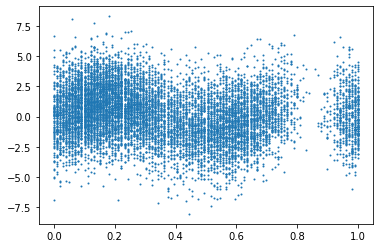

In [3]:
plt.scatter(data_x, data_y, s=1)
plt.show()

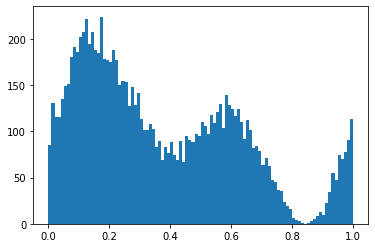

In [4]:
plt.hist(data_x, bins=100)
plt.show()

# Autohistogram

Make a histogram with the number of bins automatically determined from the data, and locate the local minimas.

In [5]:
autohist = skl_emeralds.autohistogram.auto_histogram(data_x)

/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py:93: PeakPropertyWarning: some peaks have a prominence of 0
  w = scipy.signal.peak_widths(-bin_heights_smooth, minima_idx)[0]
/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py:93: PeakPropertyWarning: some peaks have a width of 0
  w = scipy.signal.peak_widths(-bin_heights_smooth, minima_idx)[0]
/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py:90: PeakPropertyWarning: some peaks have a prominence of 0
  return scipy.signal.peak_prominences(-y, minima_idx)[0]


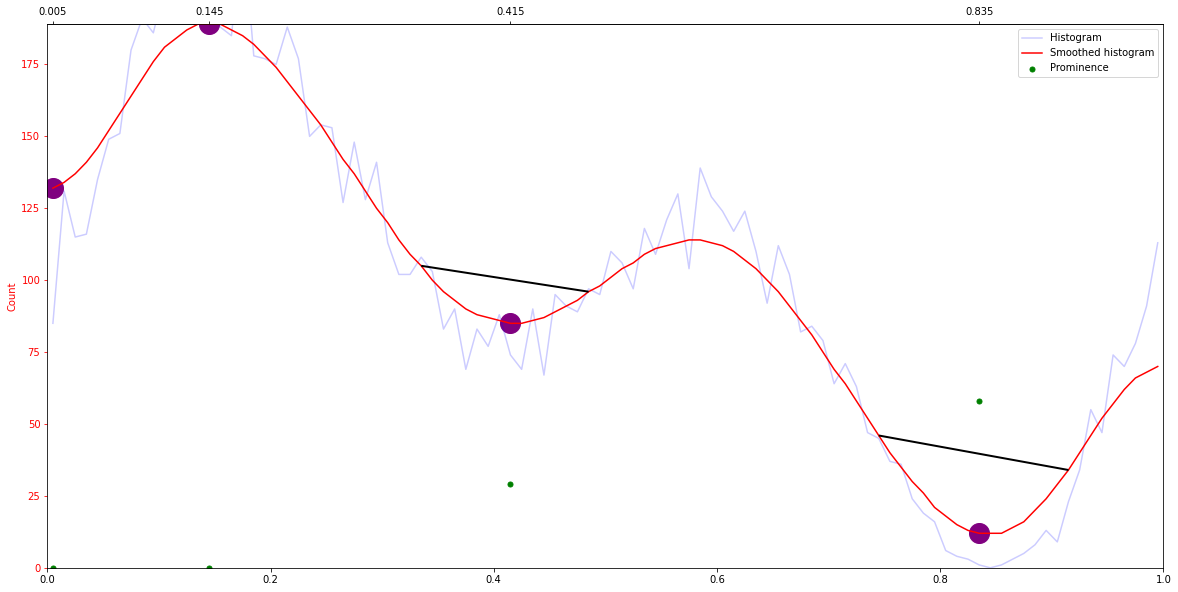

In [6]:
plt.figure(figsize=(20,10))
skl_emeralds.autohistogram.plot_autohistogram(autohist)

In [7]:
autohist["bin_centers"][autohist["minima_idx"]]

array([0.005, 0.145, 0.415, 0.835])

# Histogram from local minimas
Plot a histogram with bin edges set to the local minimas of the autohistogram:

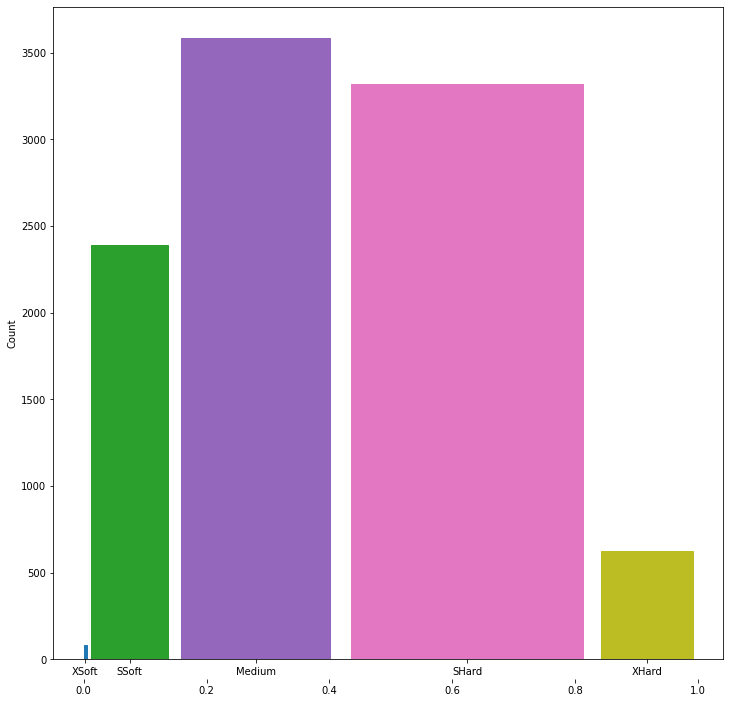

In [20]:
plt.figure(figsize=(12,12))
ax = plt.gca()
skl_emeralds.autohistogram.plot_data_split(data_x, cmap="tab20")
plt.show()

Same as above, but with bins weighted by data_y:

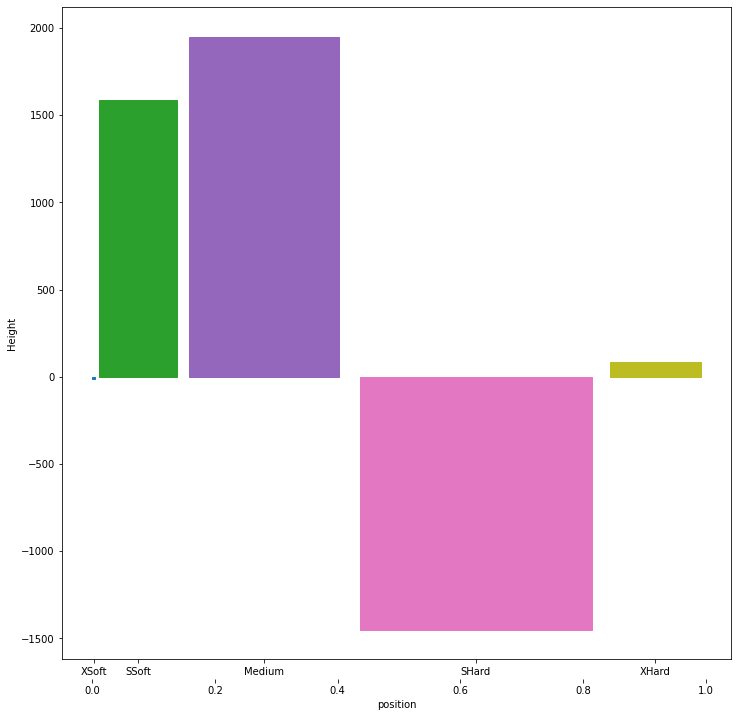

In [29]:
plt.figure(figsize=(12,12))
ax = plt.gca()
skl_emeralds.autohistogram.plot_data_split(
    pd.Series(data_x, name="Position"),
    pd.Series(data_y, name="Height"), cmap="tab20")
plt.show()

# Data splitting

Make a histogram with the number of bins automatically determined from the data, locate the local minimas
and use them as intervals to split the data into.


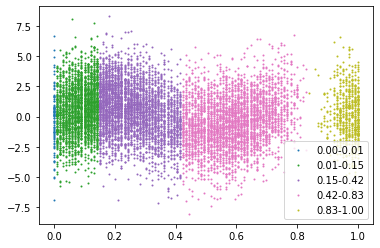

In [30]:
cmap = plt.cm.get_cmap("tab20")
splits = skl_emeralds.autohistogram.auto_split_data(data_x)
for idx, (start, end, subdata_x) in enumerate(splits):
    f = ~np.isnan(subdata_x)
    plt.scatter(subdata_x[f], data_y[f], label="%.2f-%.2f" % (start, end), s=1, color=cmap(idx / len(splits)))
plt.legend()
plt.show()